In [43]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [44]:
#Reading the data
files = glob.glob("*cybersecurity_attacks_cleaned.csv")


In [45]:
#Creating a list of dataframes
dfs = []
for file in files:
    dfs.append(pd.read_csv(file))
    

In [46]:
#Concatenating all dataframes into one
df = pd.concat(dfs, ignore_index=True)

#Checking the shape of the dataframe
print(df.shape)

(40000, 30)


In [47]:
#display random 15 rows
df.sample(15)


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Year,Month,Date,Hour,Day
13751,2020-04-14 10:25:00,207.216.145.161,90.235.176.92,5411,6487,ICMP,1093,Control,DNS,Quasi enim temporibus tenetur cum sit. Quasi e...,...,"Tezpur, Jharkhand",129.43.81.180,Log Data,Alert Data,Server,2020,April,14,10,Tuesday
23528,2022-04-26 11:52:54,132.39.130.25,125.102.79.212,45070,44112,ICMP,403,Data,FTP,Eius natus minus iste aliquam accusamus accusa...,...,"Hospet, Goa",19.111.187.10,NaN,NaN,Server,2022,April,26,11,Tuesday
27770,2021-09-20 23:55:25,144.20.232.173,100.56.100.71,47493,33412,ICMP,168,Control,FTP,Tempore soluta fugit tempore nesciunt eius. Ve...,...,"Kamarhati, Arunachal Pradesh",157.118.138.170,Log Data,Alert Data,Firewall,2021,September,20,23,Monday
28263,2023-05-10 12:24:40,120.94.182.128,77.227.67.88,41367,25588,ICMP,980,Data,HTTP,Quidem itaque nihil minus vel. Blanditiis volu...,...,"Khora , Madhya Pradesh",55.205.83.129,NaN,NaN,Server,2023,May,10,12,Wednesday
2426,2023-03-14 03:02:33,167.145.138.218,105.182.246.225,59974,19224,TCP,635,Data,HTTP,Repellat quisquam facere cum commodi. Deserunt...,...,"Tadipatri, Haryana",No Proxy,NaN,NaN,Firewall,2023,March,14,3,Tuesday
1574,2020-04-10 23:54:41,84.227.2.86,106.23.11.64,47509,63651,ICMP,1012,Control,FTP,Dolorum soluta blanditiis eum. Modi nobis adip...,...,"Bongaigaon, Manipur",No Proxy,Log Data,Alert Data,Firewall,2020,April,10,23,Friday
26291,2021-03-09 18:39:39,4.2.104.107,211.101.129.35,10842,65511,TCP,1174,Data,HTTP,Dolore distinctio delectus harum minus pariatu...,...,"Kollam, Uttarakhand",No Proxy,NaN,Alert Data,Firewall,2021,March,9,18,Tuesday
33239,2021-02-16 22:08:58,48.204.197.195,46.21.200.248,13646,63220,TCP,693,Data,HTTP,Molestias animi fugit dolor accusantium volupt...,...,"Hospet, Punjab",No Proxy,Log Data,Alert Data,Server,2021,February,16,22,Tuesday
14788,2023-06-06 18:46:15,107.65.230.42,84.30.162.239,42647,34722,UDP,1216,Data,FTP,Sequi quidem accusantium inventore commodi. Be...,...,"Proddatur, Bihar",161.182.169.248,NaN,NaN,Server,2023,June,6,18,Tuesday
4706,2021-03-30 19:28:28,177.111.223.254,180.82.106.37,17501,25064,UDP,670,Data,FTP,Consequatur voluptatem officiis voluptatum pos...,...,"Kozhikode, Gujarat",No Proxy,Log Data,NaN,Firewall,2021,March,30,19,Tuesday


In [48]:
#Checking the data types of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

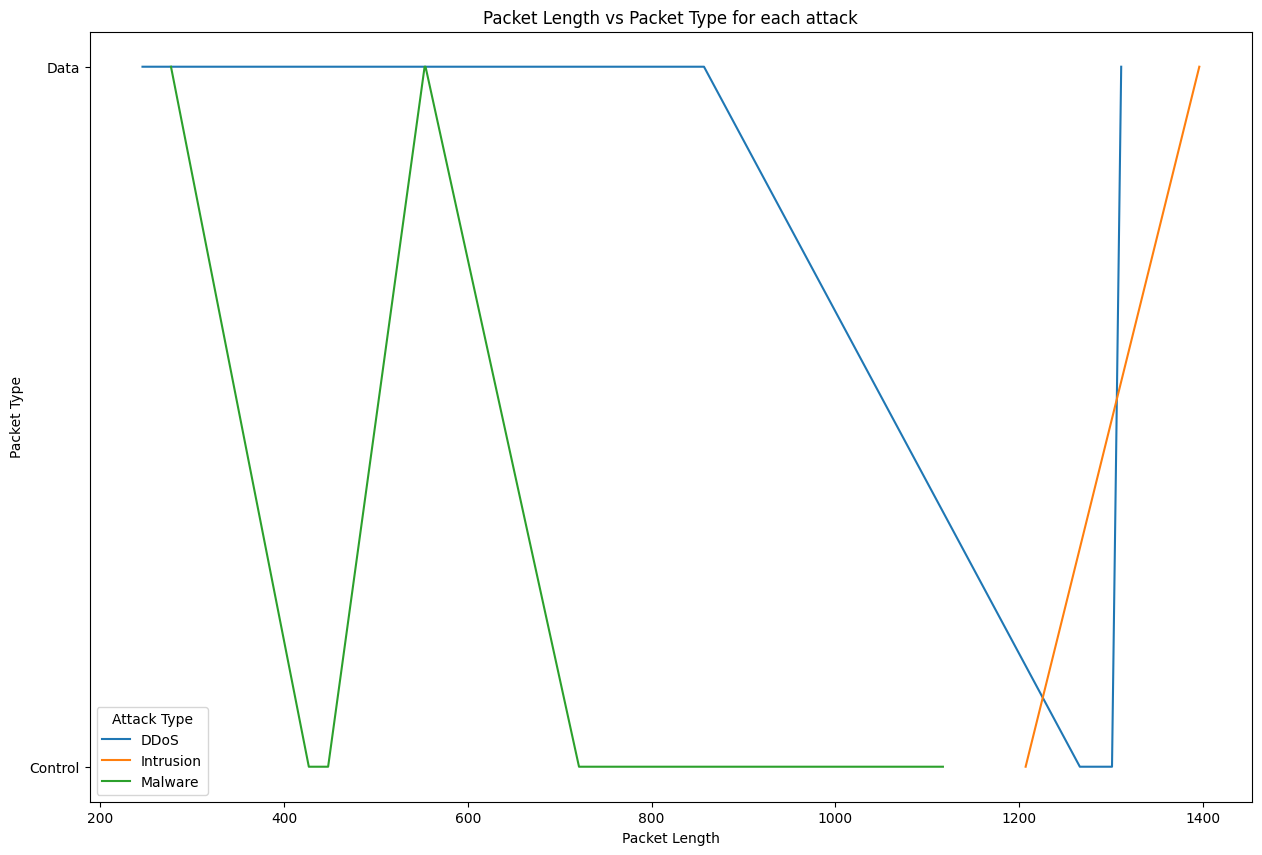

In [49]:
#plot line line graph of packet length vs packet type for each attack ramdomly of 15 rows
plt.figure(figsize=(15,10))
sns.lineplot(x='Packet Length', y='Packet Type', data=df.sample(15), hue='Attack Type')
plt.title('Packet Length vs Packet Type for each attack')
plt.show()


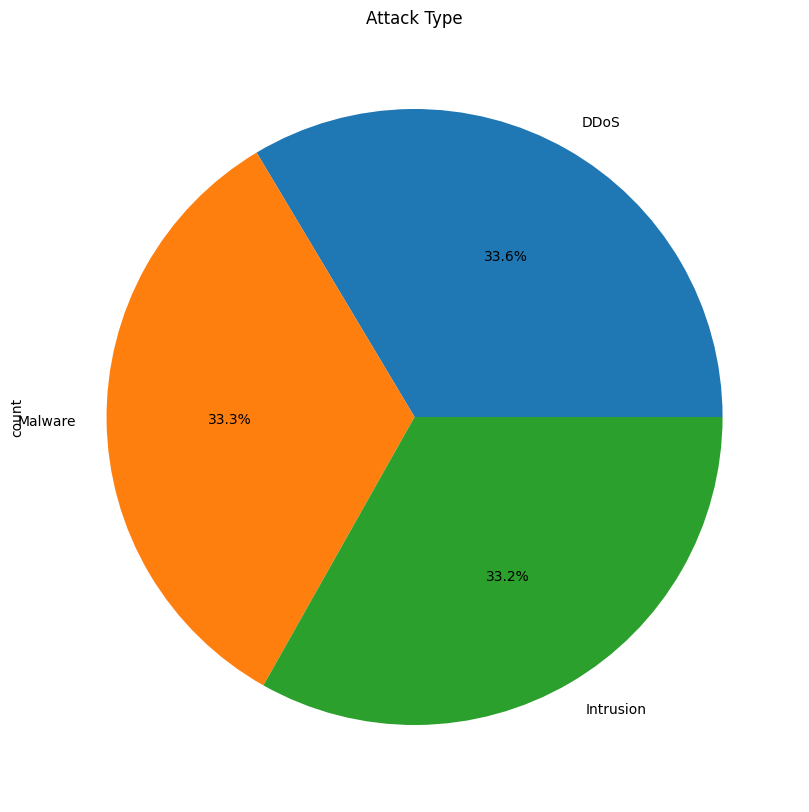

In [50]:
#plot pie chart of attack type of random 15 rows
plt.figure(figsize=(15,10))
df['Attack Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Attack Type')
plt.show()


In [51]:
#building a model of sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [52]:
#Encoding the categorical data
encoder = LabelEncoder()
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df['Attack Type'].value_counts()


Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64

In [53]:
#Splitting the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [54]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [55]:
#defining the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [56]:
#building a model of sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [57]:
#Encoding the categorical data
encoder = LabelEncoder()
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df['Attack Type'].value_counts()


Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64

In [59]:
#lstm model
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence

#Splitting the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#defining the model
model = Sequential()
model.add(Embedding(5000, 32, input_length=10))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))




In [61]:
#Adding the input and first hidden layer
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dropout(0.2))


In [64]:
print(type(X_test))
print(type(y_test))
print(X_test.dtype)  # if applicable for NumPy arrays
print(y_test.dtype)  # if applicable for NumPy arrays


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
object
object


In [63]:
# from keras.models import Sequential
# from keras.layers import Dense

# # Define your model
# model = Sequential()
# model.add(Dense(64, input_dim=10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Now you can train your model using model.fit() before evaluating it
# # For example:
# # model.fit(X_train, y_train, epochs=10, batch_size=32)

# # After training, you can evaluate the model
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1] * 100))


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [60]:
# #plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(15,10))
# sns.heatmap(cm, annot=True)
# plt.title('Confusion Matrix')
# plt.show()

NameError: name 'y_pred' is not defined

In [65]:
#plot pie chart of IP Address  vs source port of random 15 rows
plt.figure(figsize=(15,10))
df['Source Port'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Source Port')
plt.show()


KeyboardInterrupt: 